***2D Transformations***

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import string

In [9]:
def plot_points(points,  color2='#ff00cc', text=''):
    '''
    points : an array of points to be plotted
    color2 : color code for the plot
    text : a text for label
    plots a graph for given points
    '''
    
    color1='#000000'
    x,y,xt,yt = points
    
    fig, ax = plt.subplots(1,1, sharex=True, sharey=True)
    ax.plot(x, y, color=color1, alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2)
    ax.set_aspect('equal')
    ax.set_xlim(-3, 2)
    ax.set_ylim(-2, 2)

    ax.plot(xt, yt, color=color2, alpha=0.7,linewidth=3, solid_capstyle='round', zorder=2,label=text)
    ax.set_aspect('equal')
    ax.legend(loc="lower right")

In [5]:
def apply_transformation(H,P):
    '''
    H : Transformation Matrix
    P : points that transformation matrix should be aplied 
    
    Plots the resulting transformation
        
    '''
    
    Pt = np.matmul(H, P) 

    P = P/P[-1, :] #image coordinates
    P = np.insert(P,4,P[:,0],axis=1)  #for plotting purposes (lines)
    x = P[0, :]
    y = P[1, :]

    Pt = Pt/Pt[-1, :] #image coordinates
    Pt = np.insert(Pt,4,Pt[:,0],axis=1)  #for plotting purposes (lines)
    xt = Pt[0, :]
    yt = Pt[1, :]

    return x,y,xt,yt

[[0 0 1 1]
 [0 1 1 0]
 [1 1 1 1]]


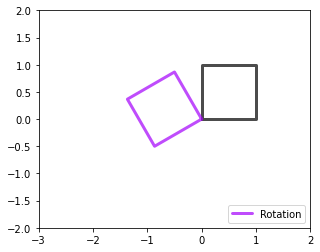

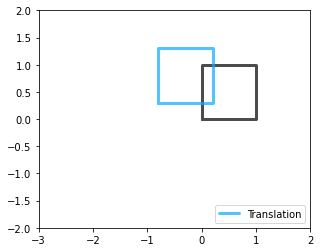

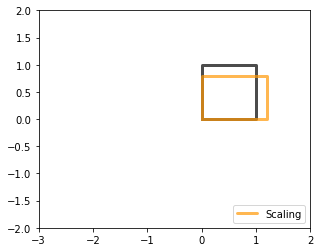

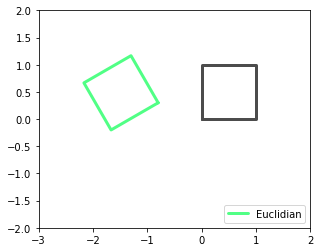

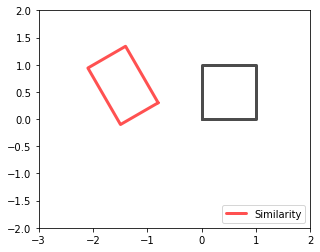

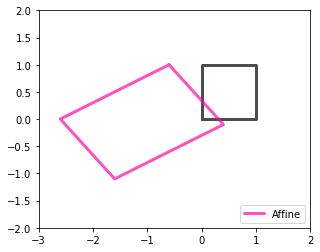

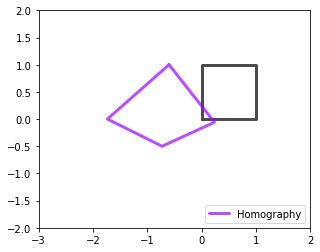

In [11]:
# points a, b and, cvi
a, b, c, d = (0, 0, 1), (0, 1, 1), (1, 1, 1), (1, 0, 1)

# matrix with row vectors of points
P = np.array([a, b, c, d]).T
print(P)

'''H = np.identity(3)
H[0,0] = 2
H[1,1] = 2
H[2, 0] = 0.3
H[2, 1] = 0.5
'''

#Transformation matrix for rotation
t =  2* np.pi/3 
R = [[np.cos(t), -np.sin(t), 0.], [np.sin(t), np.cos(t), 0.], [0., 0., 1.]] 
#Transformation matrix for translation
t1,t2 = -0.8, 0.3
T = [[1, 0, t1], [0, 1, t2], [0, 0, 1]] 
#Transformation matrix for Scaling
s1,s2 = 1.2, 0.8
S = [[s1, 0, 0], [0, s2, 0], [0, 0, 1]] 
#Transformation matrix for Euclidian
Euclidian = [[np.cos(t), -np.sin(t), t1], [np.sin(t), np.cos(t), t2], [0., 0., 1.]] 
#Transformation matrix for Similarity
Similarity = [[s1*np.cos(t), -s2*np.sin(t), t1], [s1*np.sin(t), s2*np.cos(t), t2], [0., 0., 1.]] 
#Transformation matrix for Affine
Affine = [[1, -2, -0.6], [-1.1, -1, 1], [0, 0, 1]]
#Transformation matrix for Homography
Homography = [[1, -2, -0.6], [-1.1, -1, 1], [0.7, 0.5, 1]]

plot_points(apply_transformation(R,P),'#A400FB','Rotation');  #rotation
plot_points(apply_transformation(T,P),'#07ACFF','Translation');  #translation
plot_points(apply_transformation(S,P),'#FF9907','Scaling');  #scalling
plot_points(apply_transformation(Euclidian,P),'#07FF52','Euclidian'); #euclidian transformation = Rot + Trans
plot_points(apply_transformation(Similarity,P),'#FF0707','Similarity'); #Similarity transformation = Rot + Trans + Scale
plot_points(apply_transformation(Affine,P),'#FF07A5','Affine');
plot_points(apply_transformation(Homography,P),'#9907FF','Homography');
